In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium

%matplotlib inline

In [27]:
burglaries = gpd.read_file('../data/burg_agg.geojson')

In [28]:
burglaries.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 809 entries, 0 to 808
Data columns (total 49 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   TRACTCE                      809 non-null    object  
 1   count_of_burglaries          809 non-null    int64   
 2   STATEFP                      809 non-null    object  
 3   COUNTYFP                     809 non-null    object  
 4   GEOID                        809 non-null    object  
 5   NAME                         809 non-null    object  
 6   NAMELSAD                     809 non-null    object  
 7   MTFCC                        809 non-null    object  
 8   FUNCSTAT                     809 non-null    object  
 9   ALAND                        809 non-null    int64   
 10  AWATER                       809 non-null    int64   
 11  INTPTLAT                     809 non-null    object  
 12  INTPTLON                     809 non-null    object  
 1

In [29]:
burglaries = burglaries.drop_duplicates(subset = 'TRACTCE').astype({'median_income': 'int64'})

In [30]:
burglaries.head()

,TRACTCE,count_of_burglaries,STATEFP,COUNTYFP,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,...,victim_gender,victim_race,victim_ethnicity,victim_county_resident,mapped_location,zip_code,population,median_income,burglaries_per_1000,geometry
0,016300,50,47,037,47037016300,163,Census Tract 163,G5020,S,1099214,...,F,W,Non-Hispanic,RESIDENT,"{'type': 'Point', 'coordinates': [-86.79, 36.15]}",None,2560,50710,19.531250,"POLYGON ((-86.79426 36.13750, -86.79364 36.140..."
50,016200,21,47,037,47037016200,162,Census Tract 162,G5020,S,1834986,...,F,W,Non-Hispanic,RESIDENT,"{'type': 'Point', 'coordinates': [-86.78, 36.1...",37203,3074,27174,6.831490,"POLYGON ((-86.78898 36.13514, -86.78896 36.135..."
71,011001,20,47,037,47037011001,110.01,Census Tract 110.01,G5020,S,7602541,...,F,B,Non-Hispanic,RESIDENT,"{'type': 'Point', 'coordinates': [-86.76, 36.21]}",None,6746,43107,2.964720,"POLYGON ((-86.77646 36.20665, -86.77641 36.207..."
91,019500,19,47,037,47037019500,195,Census Tract 195,G5020,S,4890994,...,F,W,Non-Hispanic,NON RESIDENT,"{'type': 'Point', 'coordinates': [-86.78, 36.15]}",None,7956,75446,2.388135,"POLYGON ((-86.80272 36.15248, -86.80084 36.153..."
110,014800,18,47,037,47037014800,148,Census Tract 148,G5020,S,759493,...,M,B,Non-Hispanic,RESIDENT,"{'type': 'Point', 'coordinates': [-86.76, 36.15]}",None,3310,15730,5.438066,"POLYGON ((-86.76948 36.15122, -86.76854 36.151..."


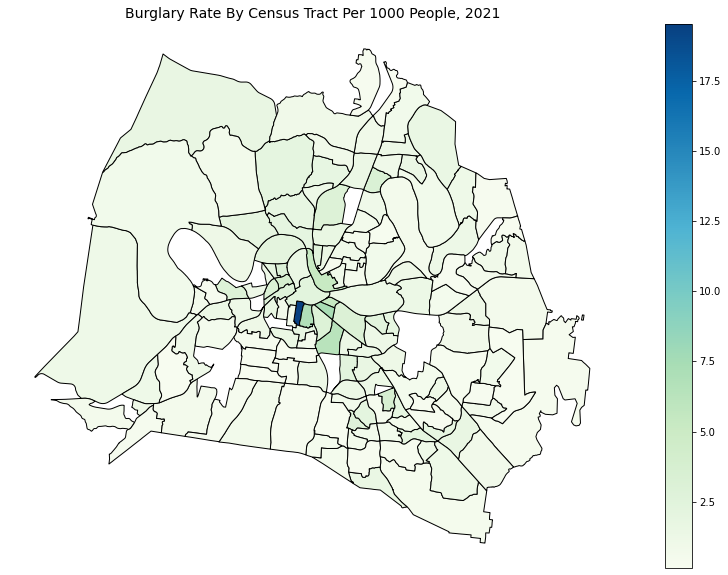

In [6]:
fig, ax = plt.subplots(figsize=(17,10))
burglaries.plot(column = 'burglaries_per_1000',
               cmap = 'GnBu', 
               edgecolor = 'black',
               legend = True, 
               ax = ax)
ax.axis('off')
plt.title('Burglary Rate By Census Tract Per 1000 People, 2021', fontsize = 14);

In [7]:
zoom = burglaries[burglaries['burglaries_per_1000'] > 5]

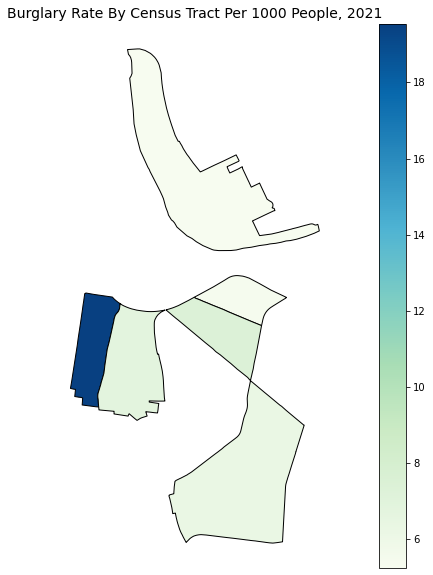

In [8]:
fig, ax = plt.subplots(figsize=(17,10))
zoom.plot(column = 'burglaries_per_1000',
               cmap = 'GnBu', 
               edgecolor = 'black',
               legend = True, 
               ax = ax)
ax.axis('off')
plt.title('Burglary Rate By Census Tract Per 1000 People, 2021', fontsize = 14);

In [9]:
max_burglaries = zoom[zoom['burglaries_per_1000'] == zoom['burglaries_per_1000'].max()]

In [10]:
center = max_burglaries.geometry.centroid
area_center = [center.y, center.x]
#area_center = [max_burglaries['latitude'], max_burglaries['longitude']]

C:\Users\sarei\AppData\Local\Temp/ipykernel_23832/2837820436.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  center = max_burglaries.geometry.centroid


In [11]:
map_tract_16300 = folium.Map(location =  area_center, zoom_start = 12)
folium.GeoJson(max_burglaries).add_to(map_tract_16300)

map_tract_16300

In [34]:
map_tract_16300 = folium.Map(location =  area_center, zoom_start = 12)
folium.GeoJson(zoom).add_to(map_tract_16300)

for row_index, row_values in police.iterrows():
    loc = [row_values['latitude'], row_values['longitude']]
    pop = str(row_values['precinct_name'])
    icon = folium.Icon(color="blue",icon = "fas fa-building", prefix = 'fa')
    
    marker = folium.Marker(
        location = loc, 
        popup = pop, icon = icon) 
    
    marker.add_to(map_tract_16300)

map_tract_16300

In [13]:
police = gpd.read_file('../data/police_precints.geojson')

In [14]:
police

,precinct_name,precinct_commander,phone_number,street,city,state,website,zip_code,latitude,longitude,geometry
0,Central Precinct,Commander Gordon Howey,(615) 862-7611,601 Korean Veterans Blvd.,Nashville,TN,{'url': 'http://www.nashville.gov/Police-Depar...,37203,36.155688,-86.777522,POINT (-86.77752 36.15569)
1,East Precinct,Commander David Imhof,(615) 862-7600,936 E. Trinity Lane,Nashville,TN,{'url': 'http://www.nashville.gov/Police-Depar...,37207,36.204518,-86.748091,POINT (-86.74809 36.20452)
2,Hermitage Precinct,Commander Preston Brandimore,(615) 880-1776,3701 James Kay Lane,Hermitage,TN,{'url': 'http://www.nashville.gov/Police-Depar...,37076,36.177823,-86.615123,POINT (-86.61512 36.17782)
3,Madison Precinct,Commander Sebastian Gourdin,(615) 880-3111,400 Myatt Dr.,Madison,TN,{'url': 'http://www.nashville.gov/Police-Depar...,37115,36.272475,-86.689540,POINT (-86.68954 36.27248)
4,Midtown Hills Precinct,Commander N. Kay Lokey,(615) 880-1411,1441 12th Avenue South,Nashville,TN,{'url': 'http://www.nashville.gov/Police-Depar...,37203,36.137279,-86.788276,POINT (-86.78828 36.13728)
5,North Precinct,Commander Terrence Graves,(615) 862-4410,2231 26th Ave. North,Nashville,TN,{'url': 'http://www.nashville.gov/Police-Depar...,37208,36.189669,-86.817973,POINT (-86.81797 36.18967)
6,South Precinct,Commander Paul Trickey,(615) 862-7744,5101 Harding Place,Nashville,TN,{'url': 'http://www.nashville.gov/Police-Depar...,37211,36.089910,-86.688058,POINT (-86.68806 36.08991)
7,West Precinct,Commander Marlene Pardue,(615) 862-7747,5500 Charlotte Pike,Nashville,TN,{'url': 'http://www.nashville.gov/Police-Depar...,37209,36.150806,-86.855196,POINT (-86.85520 36.15081)


In [35]:
map_total = folium.Map(location =  area_center, zoom_start = 10)

folium.Choropleth(
 geo_data = burglaries,
 name = 'Choropleth',
 data = burglaries,
 columns = ['TRACTCE','burglaries_per_1000'],
 key_on = 'feature.properties.TRACTCE',
 fill_color = 'YlOrRd',
 bins = [0, 5, 8, 10, 12, 15, 17, 21],
 fill_opacity = 0.5,
 line_opacity = 1,
 legend_name = 'Burglaries Per 1000 Residents',
 smooth_factor = 0
).add_to(map_total)

# for row_index, row_values in police.iterrows():
#     loc = [row_values['latitude'], row_values['longitude']]
#     pop = str(row_values['precinct_name'])
#     icon = folium.Icon(color="blue",icon = "fas fa-building", prefix = 'fa')
    
#     marker = folium.Marker(
#         location = loc, 
#         popup = pop, icon = icon) 
    
#     marker.add_to(map_total)
    
map_total.save('../maps/map_total.html')

map_total

In [31]:
burglaries_income = burglaries[burglaries['median_income'] > 0]

In [32]:
map_income = folium.Map(location =  area_center, zoom_start = 10)

folium.Choropleth(
 geo_data = burglaries_income,
 name = 'Choropleth',
 data = burglaries_income,
 columns = ['TRACTCE','median_income'],
 key_on = 'feature.properties.TRACTCE',
 fill_color = 'YlGnBu',
 #bins = [0, 5, 8, 10, 12, 15, 17, 21],
 fill_opacity = 0.5,
 line_opacity = 1,
 legend_name = 'Median Income by Census Tract',
 smooth_factor = 0
).add_to(map_income)

map_income